<a href="https://colab.research.google.com/github/PatriciaBonert/OsloAirbnb/blob/master/Oslo_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="http://sigmoidal.ai/wp-content/uploads/2019/08/logo_color.png" height="40px"></center>

# Análise dos Dados do Airbnb - Oslo

O [Airbnb](https://www.airbnb.com.br/) (por curiosidade Air, Bed and Breakfast) é considerada a maior plataforma de hotelaria do mundo e vale US$ 30 bilhões no mercado. Atualmente ela não apenas conecta pessoas que precisam se hospedar com aqueles que desejam alugar seus imóveis de maneira prática como também aqueles que desejam ofertar e adquirir experiências.

O Airbnb disponibiliza dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

Afim de iniciar meus estudos na área de Data Analytics e com interesse de conhecer a Noruega, escolhi o *dataset* da cidade de Oslo para gerar insights e produzir conteúdo relevante. Seguem as análises.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Dedico esse *notebook* ao Carlos Melo (Sigmoidal) que me apresentou um mundo de possibilidades e me serviu de inspiração para cuidar da minha carreira profissional.**

## Obtenção dos Dados


In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/norway/oslo/oslo/2019-11-29/visualisations/listings.csv')

## Análise dos Dados


Verificando o *dataset* analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,42932,"Charming apartment, Oslo Center, Ro",187463,Cecilie,NaN,Frogner,59.91234,10.72384,Entire home/apt,2000,3,37,2019-06-19,0.49,1,360
1,43198,Lovely low budgetroom in nice area!,4011871,Mona Johanne,NaN,Frogner,59.91839,10.71457,Private room,385,2,36,2019-07-28,0.67,2,0
2,69964,Lovely flat in Oslo city centre,175633,Kris,NaN,Sagene,59.93898,10.77360,Entire home/apt,1009,30,7,2013-05-18,0.07,1,363
3,71725,Central big room - ap with balcony,368229,Reidun,NaN,Gamle Oslo,59.90611,10.78000,Private room,504,4,49,2019-11-09,0.46,1,333
4,77108,Friendly & spacious in uptown Oslo,412523,Gunn Hild,NaN,Frogner,59.92478,10.71649,Entire home/apt,1917,7,14,2018-08-13,0.13,1,351


In [5]:
#vericando classificações
df["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

### **Entradas = linhas ; Variáveis = colunas**

In [6]:
# identificar o volume de dados do DataFrame
print("Volume de dados:\t {}".format(df.shape))
# verificar as entradas do DataFrame
display(df.dtypes)


Volume de dados:	 (8604, 16)


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Quantidade de valores ausentes em cada variável**

In [7]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
df.isnull().sum().sort_values(ascending=False)

neighbourhood_group               8604
reviews_per_month                 1775
last_review                       1775
name                                20
host_name                            7
availability_365                     0
calculated_host_listings_count       0
number_of_reviews                    0
minimum_nights                       0
price                                0
room_type                            0
longitude                            0
latitude                             0
neighbourhood                        0
host_id                              0
id                                   0
dtype: int64

###**Identificando outliers em entradas numéricas** 
Afim de analisar dados significativos que gerem insights, serão descartados os dados das entradas **(*caculated_host_listings_count*, *host_id*, *id*, *neighbourhood_group*, *number_of_reviews*, *reviews_per_month*.)**

Ao plotar os histogramas, percebe-se a presença das seguintes entradas com outliers: **(*minimun_nights* e *price*.)**

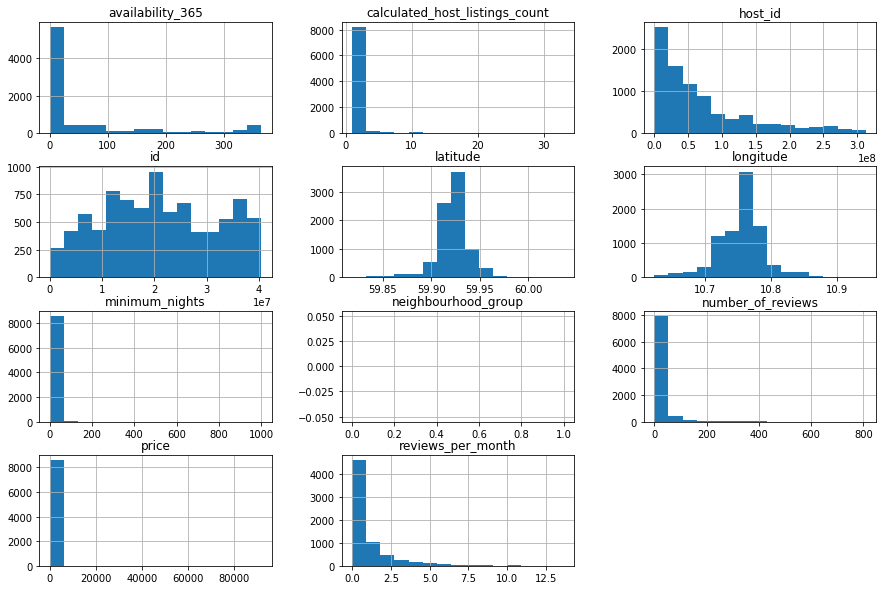

In [8]:
# plotar o histograma das entradas numéricas
df.hist(bins=15, figsize=(15,10));

In [9]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'availability_365']].describe()



,price,minimum_nights,availability_365
count,8604.000000,8604.000000,8604.000000
mean,925.830195,4.265690,58.849489
std,1691.916584,18.370528,105.173598
min,83.000000,1.000000,0.000000
25%,523.000000,2.000000,0.000000
50%,752.000000,2.000000,0.000000
75%,1000.000000,3.000000,70.000000
max,91721.000000,1000.000000,365.000000


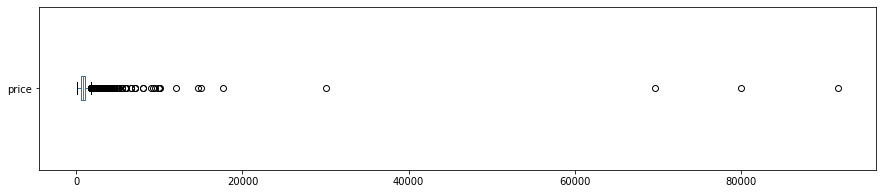


price: valores acima de 1500
909 entradas
10.5649%


In [10]:
#utilizar boxplots para análise de outliers
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

#ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price>1500])/df.shape[0])*100))

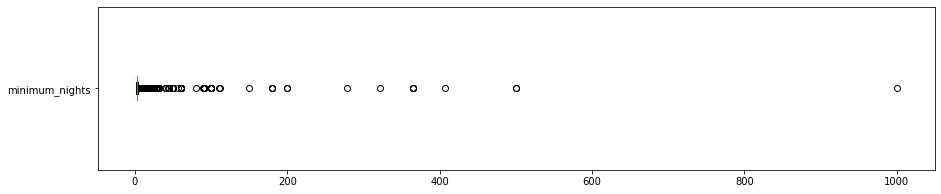

minimum_nights: valores acima de 30 dias
67 entradas
0.7787%


In [11]:
#utilizar boxplots para análise de outliers
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#ver quantidade de valores acima de 30 dias para minimum_nights
print('minimum_nights: valores acima de 30 dias')
print('{} entradas'.format(len(df[df.minimum_nights > 30])))
print('{:.4f}%'.format((len(df[df.minimum_nights > 30])/df.shape[0])*100))

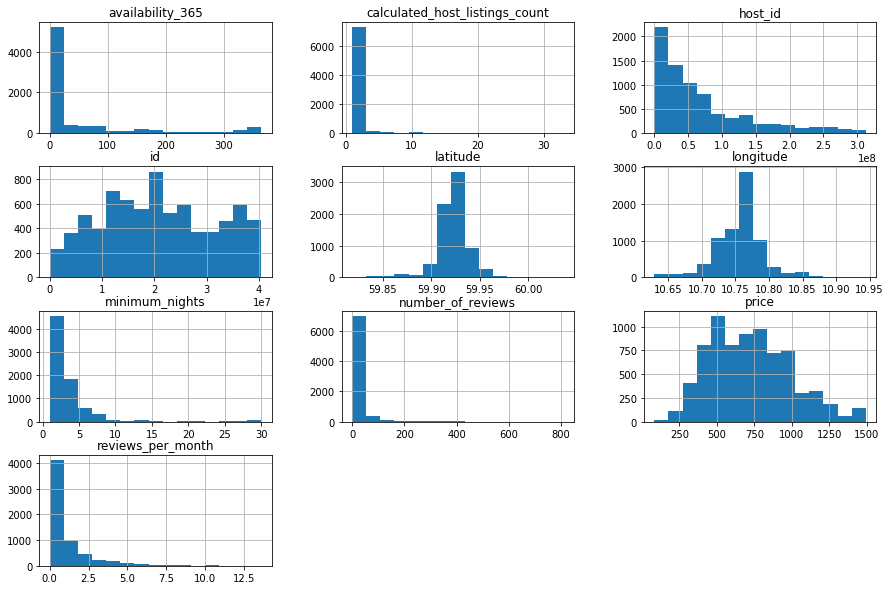

In [12]:
#remover outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

#remover variável vazia
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

#plotar Histogramas
df_clean.hist(bins=15, figsize=(15,10));


### **Média dos preços de aluguel**

In [13]:
# ver a média da coluna `price`
df_clean['price'].mean()

726.1200733272227

### **Correlação existente entre as variáveis**

In [14]:
# criar uma matriz de correlação
corr=df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.023827,-0.085420,-0.097033,-0.001669,0.056104
minimum_nights,0.023827,1.000000,-0.086972,-0.154295,-0.009597,0.036011
number_of_reviews,-0.085420,-0.086972,1.000000,0.653897,0.068270,0.194833
reviews_per_month,-0.097033,-0.154295,0.653897,1.000000,0.182190,0.212009
calculated_host_listings_count,-0.001669,-0.009597,0.068270,0.182190,1.000000,0.271852
availability_365,0.056104,0.036011,0.194833,0.212009,0.271852,1.000000


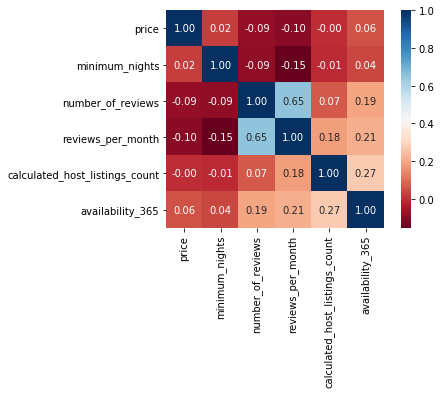

In [15]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Tipo de imóvel mais alugado**

In [16]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    5969
Private room       1563
Shared room          95
Hotel room           10
Name: room_type, dtype: int64

In [17]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.781590
Private room       0.204662
Shared room        0.012439
Hotel room         0.001309
Name: room_type, dtype: float64

### **Localidade mais cara (valor em coroa norueguesa)**



In [18]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Sentrum           855.918919
Frogner           767.796967
St. Hanshaugen    766.281563
Grünerløkka       738.789888
Nordstrand        729.345455
Ullern            726.971429
Vestre Aker       725.968912
Marka             723.157895
Nordre Aker       721.529148
Gamle Oslo        713.685253
Name: price, dtype: float64

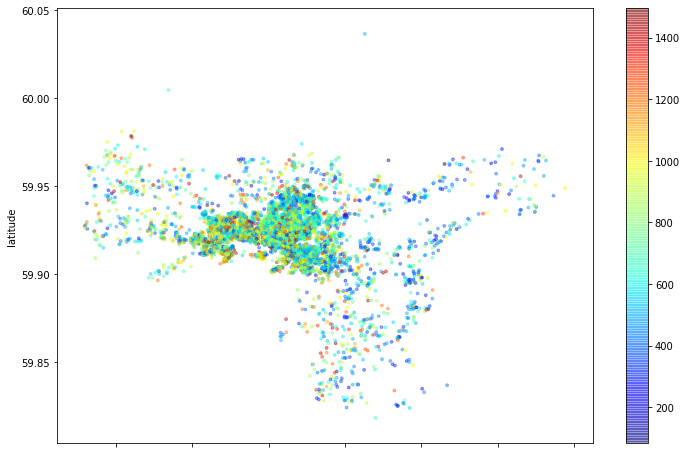

In [19]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
              c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Média do mínimo de noites para aluguel**

In [23]:
# ver a média da coluna `minimum_nights`
df_clean['minimum_nights'].mean()

3.2062328139321723